In [169]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip
#remove the comment if you want to unzip to desired folder

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='count', ylabel='Embarked'>

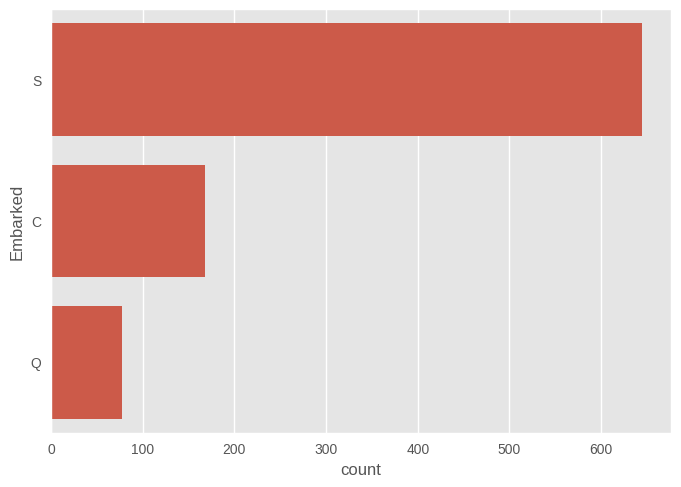

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Embarked'])

In [ ]:
mean_age = df['Age'].mean()
df = df.fillna({'Embarked': 'S', 'Age': mean_age})

In [ ]:
# Cabin Column is not needed since it is not contributing in the final decision
df.drop('Cabin', inplace=True, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df['Sex'] = df['Sex'].astype(str)
# One-hot encode 'Sex' column
df = pd.get_dummies(df, columns=['Sex'])

# Replace True and False values with 1 and 0 respectively
df.replace({True: 1, False: 0}, inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [ ]:
#One Hot encoding of Embarked Column :
df = pd.get_dummies(df, columns = ['Embarked'])
df.replace({True: 1, False: 0}, inplace=True)
df.head()



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [ ]:
features_names = ['Pclass', 'Sex_male', 'Sex_female', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'SibSp', 'Fare']

target_names = ['Dead (0)', 'Survived (1)']
train_class = df[['Survived']]
train_features = df[features_names]
train_features.head()


,Pclass,Sex_male,Sex_female,Age,Embarked_C,Embarked_Q,Embarked_S,Parch,SibSp,Fare
0,3,1,0,22.0,0,0,1,0,1,7.2500
1,1,0,1,38.0,1,0,0,0,1,71.2833
2,3,0,1,26.0,0,0,1,0,0,7.9250
3,1,0,1,35.0,0,0,1,0,1,53.1000
4,3,1,0,35.0,0,0,1,0,0,8.0500


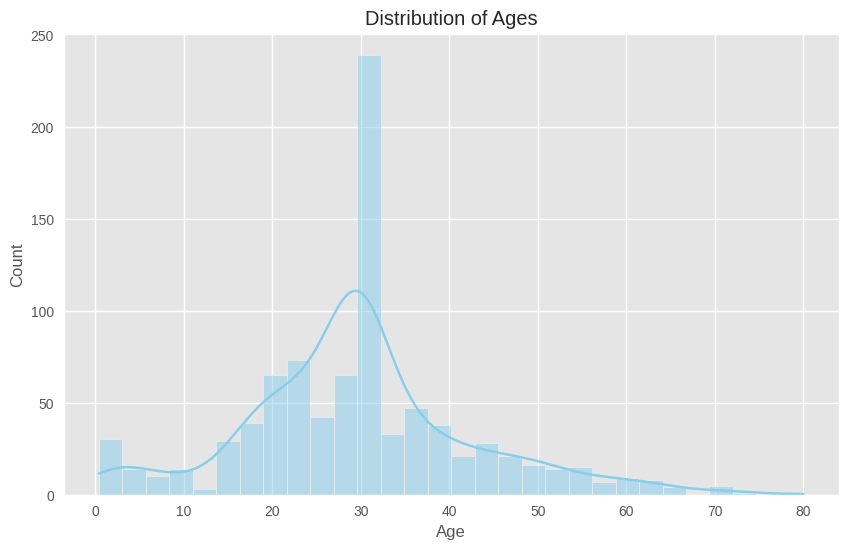

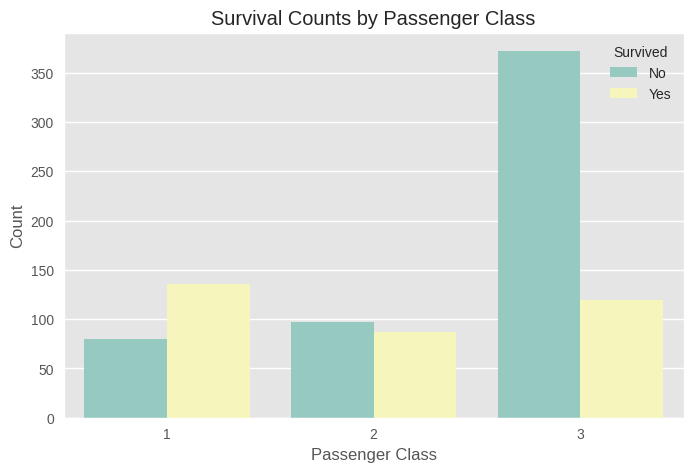

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
"""
# Plot survival counts by Male
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex_male', hue='Survived', palette='Set1')
plt.title('Survival Counts by Sex Male')
plt.xlabel('Sex_Male')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Plot survival counts by Female
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex_female', hue='Survived', palette='Set2')
plt.title('Survival Counts by Sex Female')
plt.xlabel('Sex_Female')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()
"""
# Plot survival counts by passenger class
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


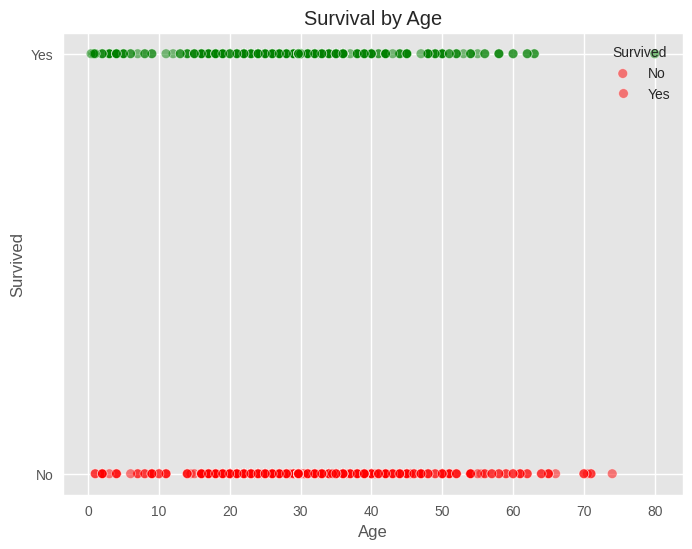

In [ ]:
# Plotting datapoints for Survived Column with Age

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Survived', hue='Survived', palette={0: 'red', 1: 'green'}, alpha=0.5)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.yticks([0, 1], ['No', 'Yes'])  # Labeling y-axis ticks as 'No' and 'Yes'
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state = 0)

In [ ]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

In [ ]:
scores = cross_validate(clf, train_features, train_class, cv=10, scoring=scoring)

In [ ]:
print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_macro', 'test_f1_macro'])
Accuracy score : 0.780
Precisoin score : 0.769
Recall score : 0.769
F1 score : 0.767


In [ ]:
# Parameter tuning - gridSearchCV
from sklearn.model_selection import GridSearchCV


para_grid = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2),
    'criterion': ("gini", "entropy")
}
clf_tree = DecisionTreeClassifier()

clf_cv = GridSearchCV(clf_tree, para_grid, scoring='accuracy', cv=5, n_jobs=-1)
clf_cv.fit(train_features, train_class)
best_parameters = clf_cv.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 30}


In [ ]:
# Once we got the best estimator values of criterion, max_depth, min_samples_split we'll use it.
clf = clf_cv.best_estimator_ # New classifier which is generated by GridSearchCV
scores = cross_validate(clf, train_features, train_class, cv=10, scoring=scoring)

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.818
Precisoin score : 0.820
Recall score : 0.792
F1 score score : 0.800


In [ ]:
# Generating Classification Report :

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_class, test_size=0.33)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))



(596, 10),(596, 1)
(295, 10),(295, 1)


In [ ]:
# Now after splitting data into train & test We need to evaluate score again and see what could be changed?
from sklearn import metrics

clf2 = clf_cv.best_estimator_
clf2.fit(X_train, y_train)
predictions = clf2.predict(X_test)
print(metrics.classification_report(y_test, predictions, target_names=target_names, digits=3))


              precision    recall  f1-score   support

    Dead (0)      0.845     0.819     0.832       199
Survived (1)      0.647     0.688     0.667        96

    accuracy                          0.776       295
   macro avg      0.746     0.753     0.749       295
weighted avg      0.780     0.776     0.778       295



Visualizer Score :  0.7762711864406779


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


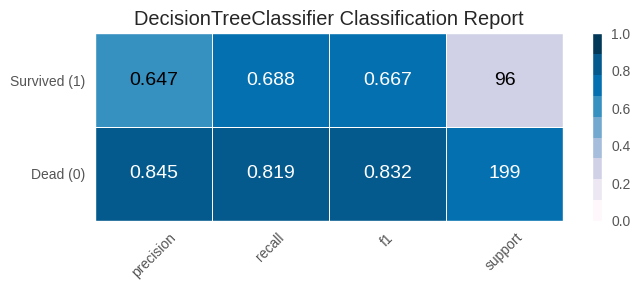

Axes(0.142817,0.247104;0.668603x0.625118)


In [ ]:
from sklearn import preprocessing

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7,3))
visualizer = ClassificationReport(clf2, classes=target_names, support=True, cmap='PuBu')
print("Visualizer Score : " , visualizer.score(X_test, y_test)) #It might be anything from accuracy, precision, recall or F1-Score
# Settting Text size & Styling:
for label in visualizer.ax.texts:
    label.set_size(14)
g = visualizer.poof()
print(g)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


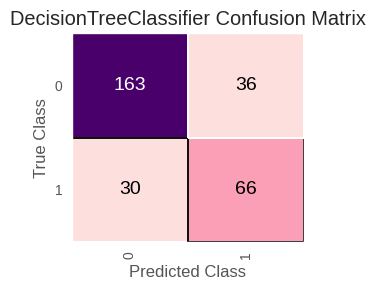

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Confusion Matrix :

fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(clf2, classes=[0, 1], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


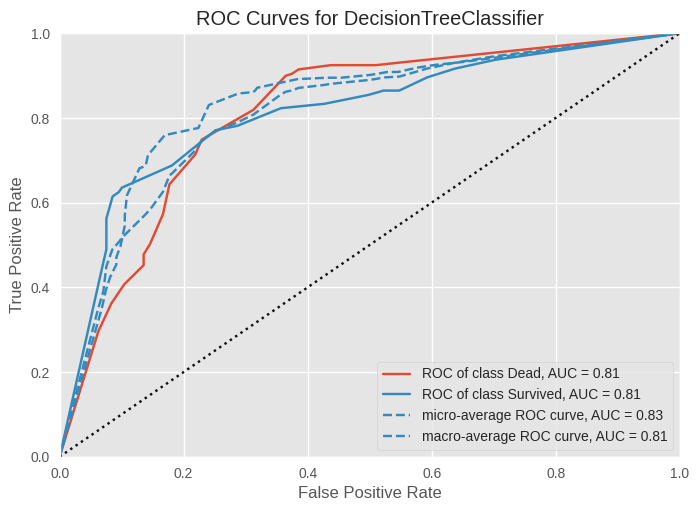

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [170]:
# ROC Curve :
modelviz = clf_cv.best_estimator_
visualizer = ROCAUC(modelviz, classes=["Dead", "Survived"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


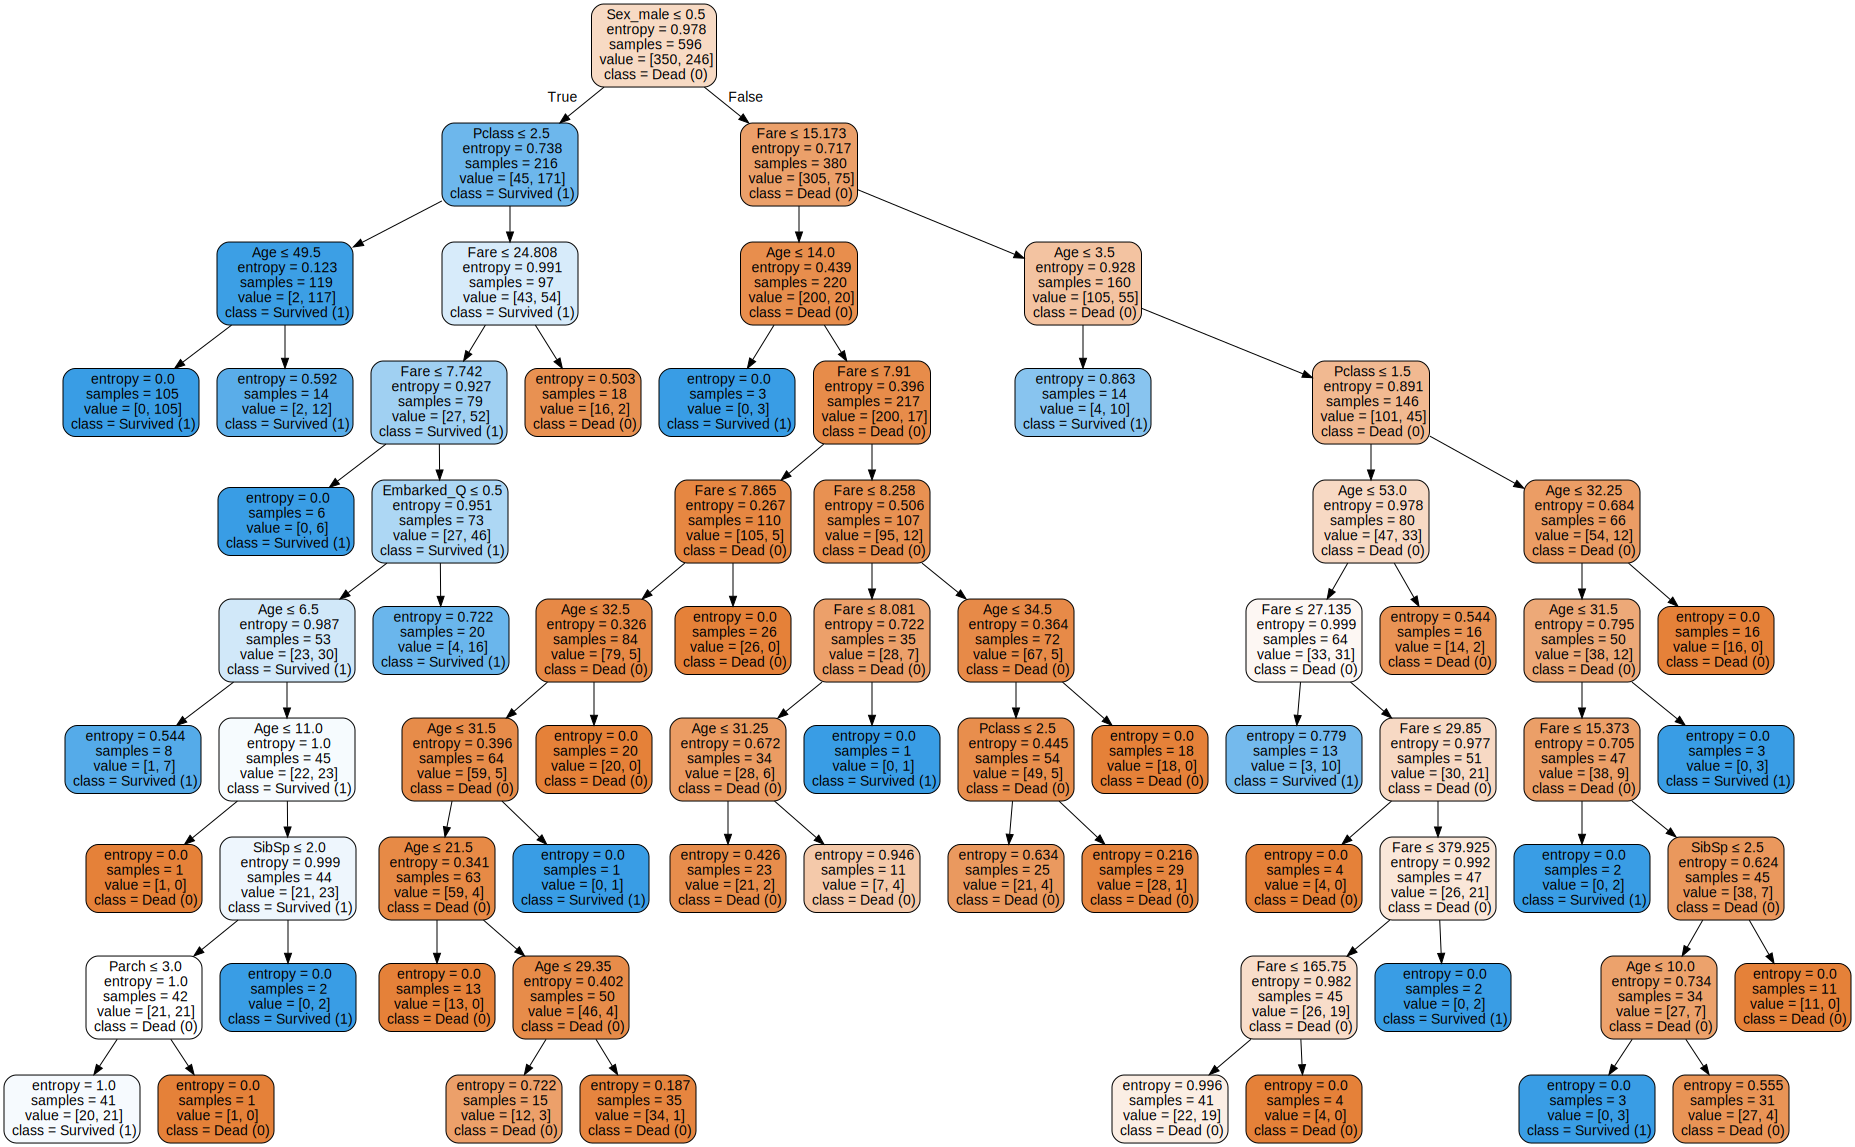

In [173]:
#Draw the decision tree using graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(clf,out_file=None, feature_names=features_names, class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

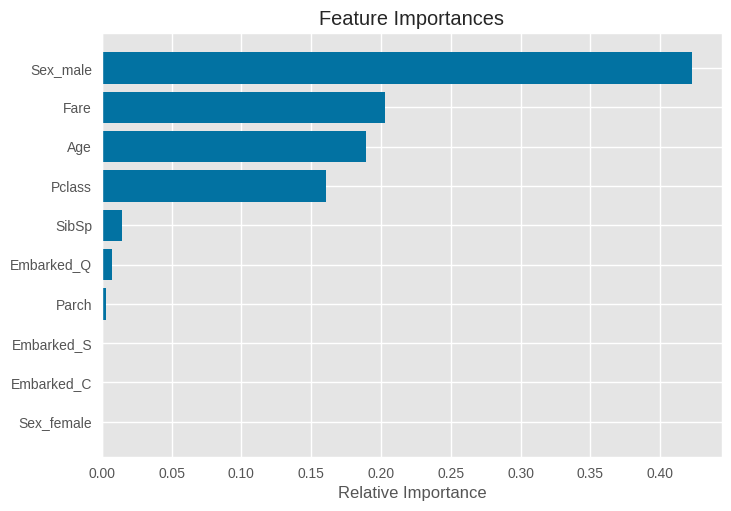

In [177]:
# Feature Importance :

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [184]:
# Creating submission file
# Loading test dataset
test = pd.read_csv('/content/test.csv')

# Fit the model
clf.fit(train_features, train_class)

# Replace missing Fare values with mean
meanFare = df['Fare'].mean()
test = test.fillna({"Fare": meanFare})
# Categorical -> One hot encoding
test = pd.get_dummies(test, columns=['Sex'])
test = pd.get_dummies(test, columns=['Embarked'])
meanAge = df['Age'].mean()
test = test.fillna({"Age": meanAge})
#set ids as PassengerId and predict survival
ids = test['PassengerId']
test_feature = test[features_names]

# test_feature.isnull().sum(axis=0)

predictions = clf.predict(test_feature)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.head()



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [186]:
output.to_csv('submission.csv', index=False)